In [134]:
#import all neccessary libraries

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
fuel_data = pd.read_csv("fuel.csv") #load the data file
fuel_data.head() #displays the top 5 rows

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.77,2.570


In [137]:
#to display the unique number of rows
fuel_data.nunique()

record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11213
fuel_cost_per_unit_burned       19416
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12590
dtype: int64

In [138]:
#to exclude categorical data type
num_data = fuel_data.select_dtypes(include=["float64","int64"])
num_data

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1,1994,5377489,16.590,18.59,18.53,1.121
1,1,1994,10486945,16.592,18.58,18.53,1.120
2,2,1994,2978683,24.130,39.72,38.12,1.650
3,2,1994,3739484,23.950,47.21,45.99,1.970
4,2,1994,40533,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...
29518,12,2018,18799,1.059,4.78,4.78,9.030
29519,12,2018,806730,1.050,3.65,3.65,6.950
29520,12,2018,104554,1.060,4.77,4.77,8.990
29521,12,2018,315945,16.108,3.06,14.76,1.110


# Question 3



In [139]:
#to calculate the average fuel type burned for each fuel type
average_fuel_type_burned = fuel_data.groupby(["fuel_type_code_pudl"])["fuel_cost_per_unit_burned"].mean().sort_values()
average_fuel_type_burned
#gas has the smallest average fuel type burned

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

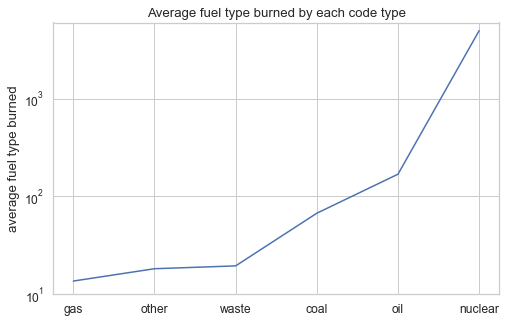

In [140]:
#the plot for the average cost per unit burned is as follows
plt.plot(average_fuel_type_burned)
plt.title("Average fuel type burned by each code type")
plt.ylim(10, 6000)
plt.yscale("log")
plt.ylabel("average fuel type burned")
plt.show()

# Question 4

What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?


In [141]:
fuel_data.describe(include="all")
#75th percentile for fuel_mmbtu_per_unit 17.006000
#std 10.600220

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2010_12_315_0_12,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


# Question 5



In [142]:
#for skewness
fuel_data.skew(axis=0,skipna= True)
#fuel_qty_burned 15.851495

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [143]:
#for kurtosis
fuel_data.kurt()
#651.369450

utility_id_ferc1                    1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

# Question 6

In [144]:
#this displays the total number of null values for wach feature in the fuel data set
null_sum = fuel_data.isnull().sum()
null_sum #fuel_unit has the highest number of null values

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [145]:
null_sum["fuel_unit"]# the total number of missing values

180

In [146]:
len(fuel_data)#total number of rows in the dataset

29523

In [147]:
perc_missing_values = (null_sum["fuel_unit"]/len(fuel_data))#calculates the percentage of the missing values
perc_missing_values

0.00609694136774718

In [148]:
"{:.3%}".format(perc_missing_values)#percentage of missing values to 3 decimal place

'0.610%'

# Question 8

In [150]:
num_corr = num_data.corr(method = "pearson")#gives us the correlation of the numerical features
num_corr

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


(7.0, 0.0)

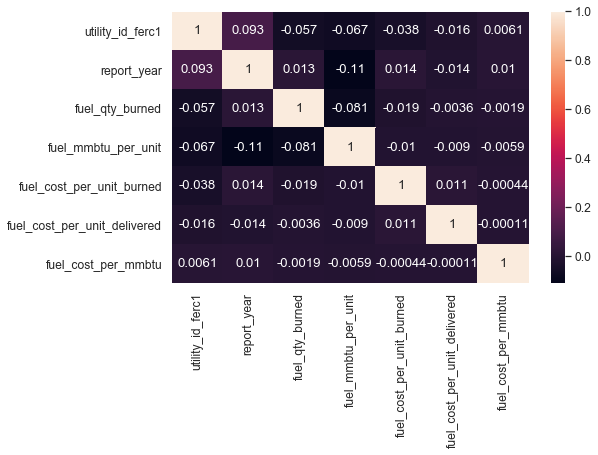

In [151]:
#the correlation matrix on a heatmap is displayed as follows
corr = sns.heatmap(num_corr,annot= True)
bottom, top = corr.get_ylim()
corr.set_ylim(bottom + 0.5,top - 0.5)

In [152]:
#second and third lowest correlation with the Fuel Cost Per Unit Burned with slicing
num_corr.loc["fuel_cost_per_unit_burned"].sort_values(ascending=True)[1:3]

fuel_qty_burned       -0.018535
fuel_mmbtu_per_unit   -0.010034
Name: fuel_cost_per_unit_burned, dtype: float64

# Question 9

In [153]:
#grouping the fuel cost per unit burned of the fuel type code for each year
yearly_costs = fuel_data.groupby(["report_year","fuel_type_code_pudl"])["fuel_cost_per_unit_burned"].sum()
yearly_costs

report_year  fuel_type_code_pudl
1994         coal                    14984.572
             gas                     10792.496
             nuclear                227983.354
             oil                      9362.194
             other                     116.737
                                       ...    
2018         coal                     9488.197
             gas                      4322.494
             nuclear                173267.161
             oil                     33836.602
             waste                     660.972
Name: fuel_cost_per_unit_burned, Length: 148, dtype: float64

In [154]:
#to calculate the percentage change of 2 years, we say ((new year-old year)/old year) * 100
year_1994,year_1998 = yearly_costs.loc[[1994,1998],"coal"]
percentage_change = ((year_1998 - year_1994)/(year_1994))*100
percentage_change

-20.56765451826049

# Question 10



In [155]:
#yearly mean costs of each fuel type per unit delivered fo reach year
yearly_costs = fuel_data.groupby(["fuel_cost_per_unit_delivered","fuel_type_code_pudl"])["report_year"].mean()
yearly_costs
#1997 is the year with the highest average mean

fuel_cost_per_unit_delivered  fuel_type_code_pudl
-874.937                      oil                    2008.0
-488.054                      oil                    2007.0
-313.410                      oil                    2004.0
-174.670                      waste                  2000.0
-170.187                      oil                    2015.0
                                                      ...  
 1942979.000                  nuclear                1997.0
 2114508.000                  nuclear                1996.0
 2255688.000                  nuclear                1997.0
 7793482.000                  nuclear                1996.0
 7964521.000                  nuclear                1997.0
Name: report_year, Length: 17737, dtype: float64